In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lovishbansal123/diamond-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lovishbansal123/diamond-dataset/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/lovishbansal123/diamond-dataset/versions/1

diamonds.csv


In [ ]:
import pandas as pd

csv = pd.read_csv(path + "/diamonds.csv")

csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# Check for null values
csv.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
csv.drop_duplicates(inplace=True)

In [ ]:
csv.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
colnames = { 'x': 'length', 'y': 'width', 'z': 'depth', 'depth': 'total_depth'}

csv.rename(columns = colnames, inplace=True)

In [ ]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        53940 non-null  float64
 1   cut          53940 non-null  object 
 2   color        53940 non-null  object 
 3   clarity      53940 non-null  object 
 4   total_depth  53940 non-null  float64
 5   table        53940 non-null  float64
 6   price        53940 non-null  int64  
 7   length       53940 non-null  float64
 8   width        53940 non-null  float64
 9   depth        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
csv.describe()

,carat,total_depth,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
display(pd.DataFrame(csv['cut'].value_counts()))

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


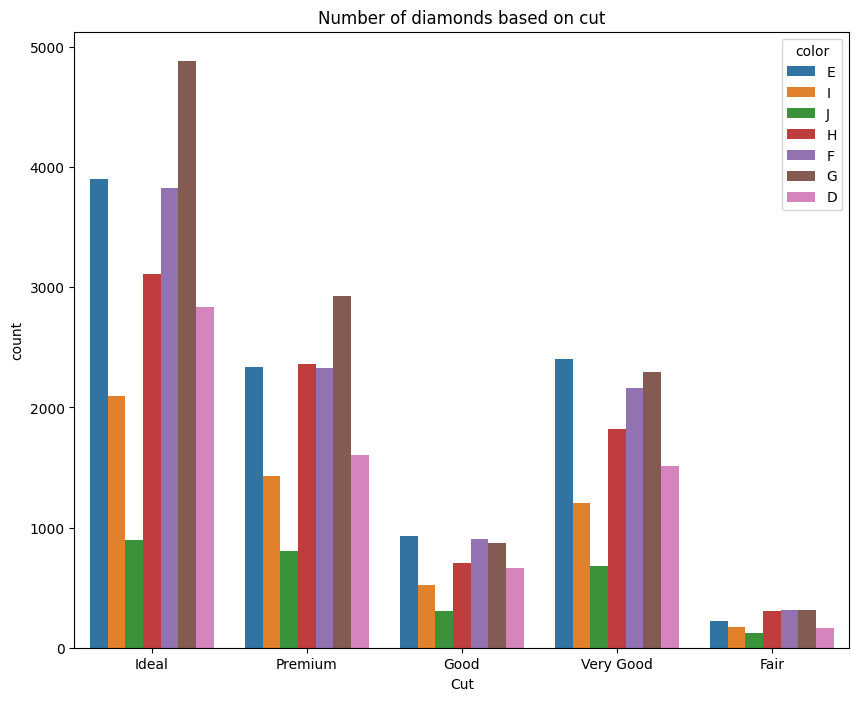

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = csv['cut'], hue= csv['color'])
plt.title('Number of diamonds based on cut')
plt.xlabel('Cut')
plt.show()

In [ ]:
display(pd.DataFrame(csv.groupby('cut')['price'].mean()))

,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


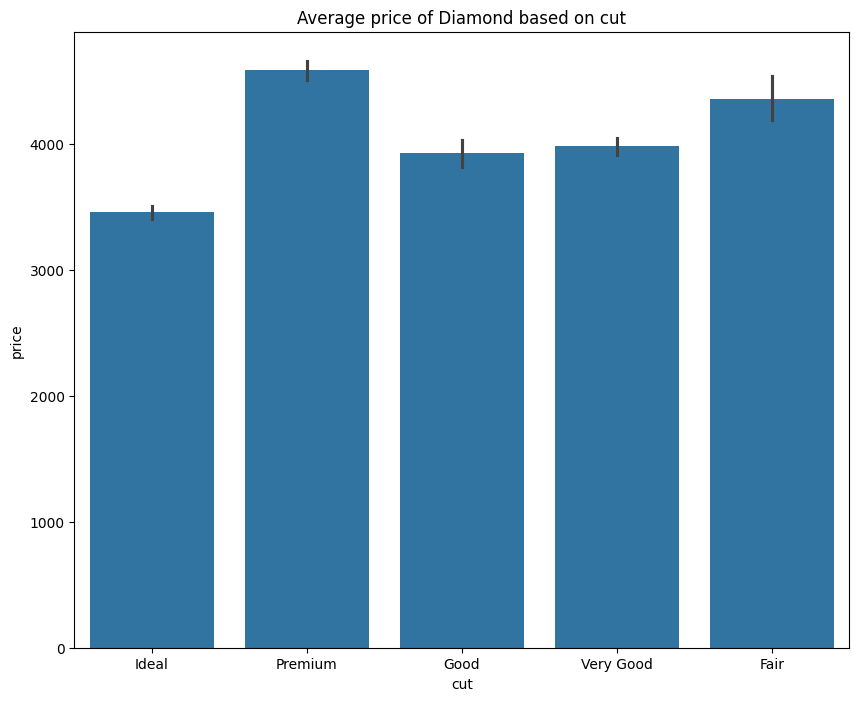

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=csv['cut'], y=csv['price'])
plt.title('Average price of Diamond based on cut')
plt.show()

In [ ]:
# Stats models API for statistical APIs
import statsmodels.api as sm
# Import Ordinary Least Square (OLS) module
from statsmodels.formula.api import ols

In [ ]:
# For running some stats on data
import scipy.stats as stats

In [ ]:
model = ols('price ~ color + cut + color:cut', data = csv).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
print(anova_table)

                 sum_sq       df           F         PR(>F)
color      2.550704e+10      6.0  279.370558   0.000000e+00
cut        9.699679e+09      4.0  159.356253  7.880786e-136
color:cut  1.653455e+09     24.0    4.527442   1.000780e-12
Residual   8.202709e+11  53905.0         NaN            NaN


In [ ]:
csv['area'] = csv['length']*csv['width']
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        53940 non-null  float64
 1   cut          53940 non-null  object 
 2   color        53940 non-null  object 
 3   clarity      53940 non-null  object 
 4   total_depth  53940 non-null  float64
 5   table        53940 non-null  float64
 6   price        53940 non-null  int64  
 7   length       53940 non-null  float64
 8   width        53940 non-null  float64
 9   depth        53940 non-null  float64
 10  area         53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
# Checking the correlation between the features
correlation_matrix = csv[['carat', 'total_depth', 'table', 'price', 'length', 'width', 'depth', 'area']].corr()

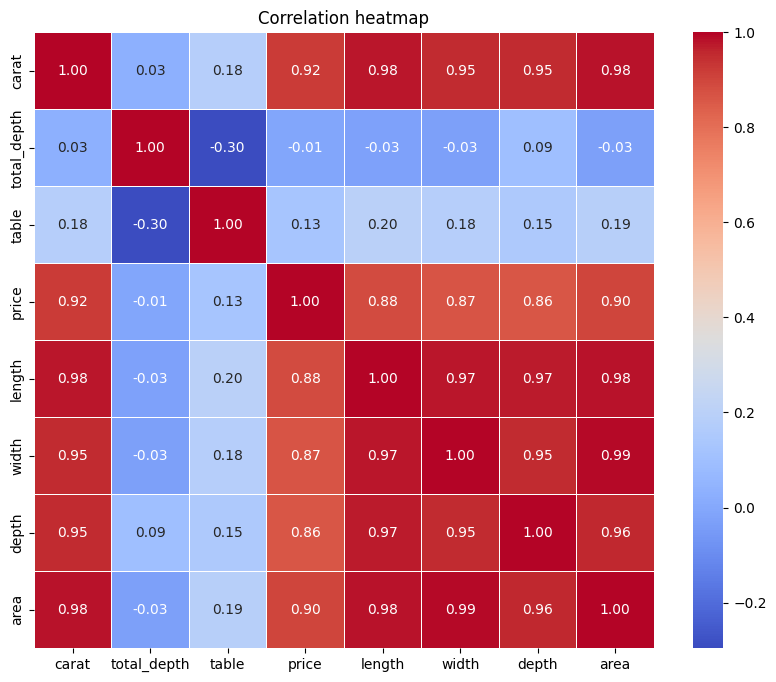

In [ ]:
# Plot heatmap based on correlation-matrix
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title('Correlation heatmap')
plt.show()

## **Now lets build the prediction models using different algorithms**

To start lets first build a Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Dependent or result variable
Y = csv['price'].to_numpy(float)

In [ ]:
# Independent variables which factor in for the dependent variable
X = csv[['carat','depth', 'color', 'cut', 'clarity', 'area', 'length', 'width']]
X = pd.get_dummies(X).to_numpy(dtype = float)

In [ ]:
# Split into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, random_state=1)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
lr = LinearRegression()

lr = lr.fit(X_train, Y_train)
print('Trainning accuracy:', r2_score(Y_train, lr.predict(X_train)))

Trainning accuracy: 0.9227798986827094


In [ ]:
import numpy as np

y_pred = lr.predict(X_test)
print('Coefficient of determination :', r2_score(Y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Coefficient of determination : 0.9118426158548241
Root mean squared error: 1181.2076387386776


Now lets look at Ridge regression

In [ ]:
ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(estimator = ridge, param_grid = parameters, cv = 5)
grid_search.fit(X_train, Y_train)
print('The best Alpha value:', grid_search.best_params_)

The best Alpha value: {'alpha': 10.0}


In [ ]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train, Y_train)
print('Coefficient of determination :', r2_score(Y_test, ridge.predict(X_test)))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, ridge.predict(X_test))))

Coefficient of determination : 0.9171761148858338
Root mean squared error: 1144.9188313354039


# **Lets build a deep learning model now**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [ ]:
output_size=1
hidden_layer=3
input_size=1
learning_rate=0.01
loss_function='mean_squared_error'
epochs=50
batch_size=10

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(hidden_layer, activation = 'relu'))
model.add(keras.layers.Dense(output_size))
model.compile(keras.optimizers.Adam(learning_rate = learning_rate), loss_function)

In [ ]:
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size,
                    verbose = False, validation_split = 0.3)

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid(True)

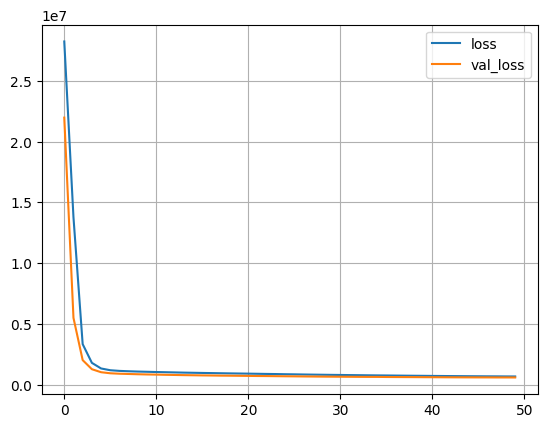

In [ ]:
plot_loss(history)

In [ ]:
y_pred = model.predict(X_test)
print('Coefficient of determination: ', r2_score(Y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Coefficient of determination:  0.9530132999398004
RMSE: 862.3515966495994
